# Object Detection using YOLO

Welcome to this week's hands-on lab. In this lab, we are going to learn how to train a gold fish detector!

At the end of this exercise, you will be able to:

- create an object detection dataset in YOLO format
- fine-tune a YOLO pretrained model with the custom dataset
- monitor the training progress and evaluation metrics
- deploy the trained model for object detection

## Create an object detection dataset

We will use a goldfish dataset to illustrate the process of annotation and packaging the dataset into different format for object detection (e.g. YOLO, Pascal VOC, COCO, etc).

To annotate, there are many different tools available, such as the very basic [LabelImg](https://github.com/HumanSignal/labelImg) , or the more feature-packed tool such as [Label Studio](https://labelstud.io/), or online service such as [Roboflow](https://roboflow.com/).

### Raw Image Dataset

You can download the goldfish images (without annotations) from this link:

https://github.com/nyp-sit/iti121-2025s2/raw/refs/heads/main/L6/data/goldfish_v1_raw.zip


Unzip the file to a local folder.

There are total of 74 images. You should divide the images into both training and validation set (e.g. 80%-20%, i.e. 59 images for train, and 15 for test).


### Download Annotated Dataset

To save you time for this lab, you can download a pre-annotated goldfish_v1 dataset [here](https://github.com/nyp-sit/iti121-2025s2/raw/refs/heads/main/L6/data/goldfish_v1.zip).

We download and unzip to the directory called `datasets/goldfish_v1`



In [1]:
%%capture
%%bash

#wget https://github.com/nyp-sit/iti121-2025s2/raw/refs/heads/main/L6/data/goldfish_v1.zip
wget https://github.com/EN-303/CapyFlower/raw/refs/heads/main/assignment2.zip
#mkdir -p datasets/assignment1/
unzip assignment2.zip -d datasets/

In [2]:
%%capture
!pip install ultralytics

## Training the Model

YOLOv11 comes with different sizes of pretrained models: yolo11n, yolo11s, .... They differs in terms of their sizes, inference speeds and mean average precision:

<img src="https://github.com/nyp-sit/iti121-2025s2/blob/main/L6/assets/yolo11-models.png?raw=true" width="70%"/>


We will use the small pretrained model yolo11s and finetune it on our custom dataset.


### Setup the logging

Ultralytics support logging to `wandb`, `comet.ml` and `tensorboard` and `mlflow` out of the box. Here we only enable wandb.

You need to create an account at [`wandb`](https://wandb.ai) and get the API key from https://wandb.ai/authorize.

*For mlflow users, you can refer to Ultralytics's mlflow integration here: https://docs.ultralytics.com/integrations/mlflow/*


In [3]:
from ultralytics import settings

settings.update({"wandb": True,
                 "clearml": False,
                 "comet": False})

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


### Training

We specify the path to `data.yaml` file, and train with a batch size of 64 (reduce accordingly if you encounter out-of-memory error), and we also save the checkpoint at each epoch (save_period=1). We assume here you are connected to a GPU, hence we can specify the device to use as `device=0` to select the first GPU.  We specify the project name as `goldfish_v1`, this will create a folder called `goldfish_v1` to store the weights and various training artifacts such as F1, PR curves, confusion matrics, training results (loss, mAP, etc).

For a complete listing of train settings, you can see [here](https://docs.ultralytics.com/modes/train/#train-settings).

You can also specify the type of data [augmentation](https://docs.ultralytics.com/modes/train/#augmentation-settings-and-hyperparameters)  you want as part of the train pipeline.

You can monitor your training progress at wandb (the link is given in the train output below)


In [4]:
!ls -la datasets/assignment2/train/images | wc -l

94


In [5]:
from ultralytics import YOLO
from ultralytics import settings

model = YOLO("yolo11s.pt")  # Load a pre-trained YOLO model
result = model.train(data="datasets/assignment2/data.yaml",
                     epochs=30,
                     save_period=1, #save at each epochs
                     batch=64,#64 images at once
                     device=0, #gpu 0
                     project='assignment2',
                     plots=True)

Ultralytics 8.3.248 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=64, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=datasets/assignment2/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12

/usr/local/lib/python3.12/dist-packages/notebook/notebookapp.py:191: SyntaxWarning: invalid escape sequence '\/'
  | |_| | '_ \/ _` / _` |  _/ -_)
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice:

 2


wandb: You chose 'Use an existing W&B account'
wandb: Logging into https://api.wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: Find your API key here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: nah-evangeline (nah-evangeline-na) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  3                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  4                  -1  1    103360  ultralytics.nn.modules.block.C3k2            [128, 256, 1, False, 0.25]    
  5                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  6                  -1  1    346112  ultralytics.nn.modules.block.C3k2            [256, 256, 1, True]           
  7                  -1  1   1180672  ultralytics

wandb: WARNING Tried to log to step 30 that is less than the current step 31. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.


lr/pg0,▁▂▃▄▄▅▆▆▆▇▇████████▇▇▇▆▆▅▅▄▃▃▂
lr/pg1,▁▂▃▄▄▅▆▆▆▇▇████████▇▇▇▆▆▅▅▄▃▃▂
lr/pg2,▁▂▃▄▄▅▆▆▆▇▇████████▇▇▇▆▆▅▅▄▃▃▂
metrics/mAP50(B),▁▁▁▄▅▆▇▇▇█▇▇██▇▇▇▇▇█▇█████████
metrics/mAP50-95(B),▁▁▁▄▄▆▇▇▇▇▇▇▇█▇▇▇▇▇▇▇▇████████
metrics/precision(B),▁▁▁▆▇▆▆▆▇▆▇▇▇█▇▇▇▇▇██▇▇▇▇▇▇▇▇█
metrics/recall(B),▂▂▁▃▃▆▆▇▇█▇▆▇▇▇▇▇▇▇▇▇█▇▇█▇█▇▇▇
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
+6,...


You can see the various graphs in your wandb dashboard, for example:

*metrics*

<img src="https://github.com/nyp-sit/iti121-2025s2/blob/main/L6/assets/wandb-metrics.png?raw=true" width="70%"/>

*Train and validation loss*

<img src="https://github.com/nyp-sit/iti121-2025s2/blob/main/L6/assets/wandb-loss.png?raw=true" width="70%"/>

You can go to the folder `goldfish_v1-->train-->weights` and you will files like epoch0.pt, epoch1.pt, .... and also best.pt.
The epoch0.pt, epoch1.pt are the checkpoints that are saved every period (in our case, we specify period as 1 epoch).  The best.pt contains the best checkpoint.

We can run the best model (using the best checkpoint) against the validation dataset to see the overall model performance on validation set.  

You should see around `0.95` for `mAP50`, and `0.45` for `mAP50-95`.

In [6]:
from ultralytics import YOLO

model = YOLO("assignment2/train/weights/best.pt")
validation_results = model.val(data="datasets/assignment2/data.yaml", device="0")

Ultralytics 8.3.248 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 100 layers, 9,413,574 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3478.2±525.0 MB/s, size: 232.9 KB)
val: Scanning /content/datasets/assignment2/valid/labels.cache... 24 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 24/24 43.5Kit/s 0.0s
val: /content/datasets/assignment2/valid/images/ef35406a-sunflower_043.jpg: 5 duplicate labels removed
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 2/2 1.2s/it 2.4s
                   all         24        195      0.875       0.72       0.82      0.603
              capybara         12         28      0.954      0.745      0.803      0.528
             sunflower         12        167      0.795      0.695      0.836      0.678
Speed: 6.3ms preprocess, 17.5ms inference, 0.0ms loss, 6.4ms postprocess per image
Results saved to /content/ru

## Export and Deployment

Your model is in pytorch format (.pt). You can export the model to various format, e.g. TorchScript, ONNX, OpenVINO, TensorRT, etc. depending on your use case, and deployment platform (e.g. CPU or GPU, etc)

You can see the list of [supported formats](https://docs.ultralytics.com/modes/export/#export-formats)  and the option they support in terms of further optimization (such as imagesize, int8, half-precision, etc) in the ultralytics site.

Ultralytics provide a utility function to benchmark your model using different supported formats automatically. You can uncomment the code in the following code cell to see the benchmark result. If you are benchmarking for CPU only, the change the `device=0` to `device='cpu'`.  

**Beware: it will take quite a while to complete the benchmark**

In [ ]:
# from ultralytics.utils.benchmarks import benchmark

# # Benchmark on GPU (device=0 means the 1st GPU device)
# benchmark(model="goldfish_v1/train/weights/best.pt", data="datasets/data.yaml", imgsz=640, half=False, device=0)


In the following code, we export it as OpenVINO. OpenVINO is optimized for inference on Intel CPUs and since we will use the model later on to do inference on local Windows machine (which runs Intel chip), we will export it as OpenVINO format. We also specify using int8 quantization, which results in faster inference, at the cost of accuracy.

For more information on OpenVINO, go to the [official documentation](https://docs.openvino.ai/2024/index.html).

After export, you can find the openvino model in `goldfish_v1\train\weights\best_openvino_model` directory.

In [7]:
model = YOLO("assignment2/train/weights/best.pt")
exported_path = model.export(format="openvino", int8=True)

Ultralytics 8.3.248 🚀 Python-3.12.12 torch-2.9.0+cu126 CPU (Intel Xeon CPU @ 2.00GHz)
WARNING ⚠️ INT8 export requires a missing 'data' arg for calibration. Using default 'data=coco8.yaml'.
💡 ProTip: Export to OpenVINO format for best performance on Intel hardware. Learn more at https://docs.ultralytics.com/integrations/openvino/
YOLO11s summary (fused): 100 layers, 9,413,574 parameters, 0 gradients, 21.3 GFLOPs

PyTorch: starting from 'assignment2/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 6, 8400) (18.3 MB)
requirements: Ultralytics requirement ['openvino>=2024.0.0'] not found, attempting AutoUpdate...
Using Python 3.12.12 environment at: /usr
Resolved 4 packages in 638ms
Prepared 2 packages in 1.19s
Installed 2 packages in 20ms
 + openvino==2025.4.1
 + openvino-telemetry==2025.2.0

requirements: AutoUpdate success ✅ 2.4s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect


OpenVINO: starting export with open

Output()

Output()

OpenVINO: export success ✅ 32.2s, saved as 'assignment2/train/weights/best_int8_openvino_model/' (9.8 MB)

Export complete (33.1s)
Results saved to /content/assignment2/train/weights
Predict:         yolo predict task=detect model=assignment2/train/weights/best_int8_openvino_model imgsz=640 int8 
Validate:        yolo val task=detect model=assignment2/train/weights/best_int8_openvino_model imgsz=640 data=datasets/assignment2/data.yaml int8 
Visualize:       https://netron.app


## Inference

Let's test our model on some sample pictures. You can optionally specify the confidence threshold (e.g. `conf=0.5`), and the IoU (e.g. `iou=0.6`) for the NMS. The model will only output the bounding boxes of those detection that exceeds the confidence threshould and the IoU threshold.  


Found https://github.com/EN-303/CapyFlower/raw/refs/heads/main/sample/combine_002.png locally at combine_002.png
image 1/1 /content/combine_002.png: 384x640 1 capybara, 4 sunflowers, 11.4ms
Speed: 1.6ms preprocess, 11.4ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)
ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'capybara', 1: 'sunflower'}
obb: None
orig_img: array([[[ 48,  60,  77],
        [ 52,  70,  97],
        [ 51,  70,  96],
        ...,
        [ 50,  64,  84],
        [ 49,  63,  83],
        [ 49,  64,  82]],

       [[ 52,  64,  81],
        [ 55,  74, 101],
        [ 49,  67,  95],
        ...,
        [ 51,  64,  85],
        [ 50,  64,  83],
        [ 50,  64,  83]],

       [[ 59,  70,  87],
        [ 62,  80, 107],
        [ 59,  76, 105],
        ...,
        [ 51,  65,  85],
        [ 51,  65,  84],
        [ 51,  65,  83]],

       ...,

       [[ 

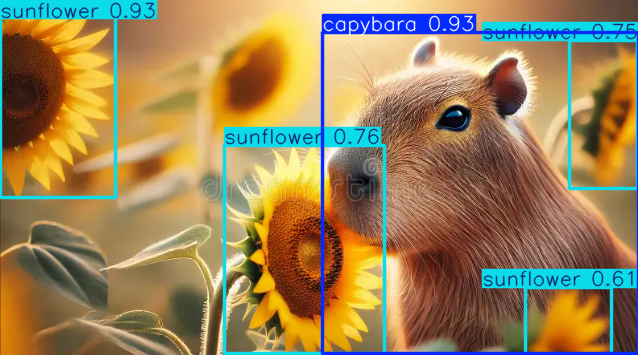

In [29]:
import ultralytics
from ultralytics import YOLO
from PIL import Image

#source = 'https://raw.githubusercontent.com/nyp-sit/iti121-2025S2/refs/heads/main/L6/samples/goldfish_sample.jpg'
source = 'https://github.com/EN-303/CapyFlower/raw/refs/heads/main/sample/combine_002.png'
#model = YOLO("assignment2/train/weights/best_int8_openvino_model", task='detect')
model = YOLO("assignment2/train/weights/best.pt", task='detect')
result = model(source, conf=0.5, iou=0.7)

# Visualize the results
for i, r in enumerate(result):
    print(r)
    # Plot results image
    im_bgr = r.plot()  # BGR-order numpy array
    im_rgb = Image.fromarray(im_bgr[..., ::-1])  # RGB-order PIL image

    # Show results to screen (in supported environments)
    r.show()

    # Save results to disk
    r.save(filename=f"results{i}.jpg")

## Download the Model

If you are training your model on Google Colab, you will download the exported OpenVINO model to a local PC. If you are training your model locally, then the exported model should already be on your local PC.

Run the following code to zip up the OpenVINO folder and download to local PC.

*Note: If you encountered error message "NotImplementedError: A UTF-8 locale is required. Got ANSI_X3.4-1968", uncomment the following cell and run it.*


In [ ]:
# import locale
# locale.getpreferredencoding = lambda: "UTF-8"

In [13]:
%%bash
mv ./assignment2/train/weights/best_int8_openvino_model/ .
zip -r assignment2_openvino_model.zip best_int8_openvino_model

# Now go to best_openvino_model to download the best_openvino_model.zip file

  adding: best_int8_openvino_model/ (stored 0%)
  adding: best_int8_openvino_model/metadata.yaml (deflated 36%)
  adding: best_int8_openvino_model/best.xml (deflated 95%)
  adding: best_int8_openvino_model/best.bin (deflated 17%)


## Streaming

We can also do real-time detection on a video or camera steram.

The code below uses openCV library to display video in a window, and can only be run locally on a local laptop.




### Video File

You need `OpenCV` to run the following code.  In your conda environment, install `opencv` for python using the following command:

```
pip3 install opencv-python
```
or
```
conda install opencv
```

Let's donwload the sample video file.

In [ ]:
!wget https://raw.githubusercontent.com/nyp-sit/iti121-2025S2/refs/heads/main/L6/samples/goldfish_480p_10s.mp4

### Streaming and display video

In [ ]:
from ultralytics import YOLO
import cv2

# Load the YOLO model
model = YOLO("best_int8_openvino_model", task="detect")

# Open the video file
video_path = "goldfish_480p_10s.mp4"
cap = cv2.VideoCapture(video_path)

# Loop through the video frames
while cap.isOpened():
    # Read a frame from the video
    success, frame = cap.read()

    if success:
        # Run YOLO inference on the frame on GPU Device 0
        results = model(frame, device="cpu")

        # Visualize the results on the frame
        annotated_frame = results[0].plot()

        # Display the annotated frame
        cv2.imshow("YOLO Inference", annotated_frame)

        # Break the loop if 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break
    else:
        # Break the loop if the end of the video is reached
        break

# Release the video capture object and close the display window
cap.release()
cv2.destroyAllWindows()

### Detect and write to a video file

In [ ]:
from ultralytics import YOLO
import cv2
# from tqdm import tqdm
from tqdm.auto import tqdm

def write_video(video_in_filepath, video_out_filepath, model):
    # Open the video file

    video_reader = cv2.VideoCapture(video_in_filepath)

    nb_frames = int(video_reader.get(cv2.CAP_PROP_FRAME_COUNT))
    frame_h = int(video_reader.get(cv2.CAP_PROP_FRAME_HEIGHT))
    frame_w = int(video_reader.get(cv2.CAP_PROP_FRAME_WIDTH))
    fps = video_reader.get(cv2.CAP_PROP_FPS)

    video_writer = cv2.VideoWriter(video_out_filepath,
                            cv2.VideoWriter_fourcc(*'mp4v'),
                            fps,
                            (frame_w, frame_h))

    # Loop through the video frames
    for i in tqdm(range(nb_frames)):
        # Read a frame from the video
        success, frame = video_reader.read()

        if success:
            # Run YOLO inference on the frame on GPU Device 0
            results = model(frame, conf=0.6, device=0)

            # Visualize the results on the frame
            annotated_frame = results[0].plot()

            # Write the annotated frame
            video_writer.write(annotated_frame)

    video_reader.release()
    video_writer.release()
    cv2.destroyAllWindows()
    cv2.waitKey(1)


In [ ]:
from pathlib import Path
import os

video_in_file = "goldfish_480p_10s.mp4"
basename = Path(video_in_file).stem
video_out_file = os.path.join(basename + '_detected' + '.mp4')
model = YOLO("best_int8_openvino_model", task="detect")
write_video(video_in_file, video_out_file, model)

## Improving the object detection model

You will notice that the trained goldfish detector did not perform well in detecting the goldfishes in the fish tank.  

Can you give a reason why?

### Exercise

Now take a look at goldfish_v2 dataset.  What do you observe? Do you think this is a better dataset to use for the domain that was set.

Now train a goldfish detector, using the goldfish_v2 dataset.  Evaluate the model on the same sample image and video. Compare the results and discuss.